# US Personal Medical Insurance - Regional Analysis

As mentioned in the [README](./README.md), the goal of this project quantify the impact of regional factors on insurance charges and to identify if certain regions are more prone to higher charges and why. As such, I have identified 3 different analyses that will help me achieve this goal:

1. Descriptive Statistics - This will help to identify the differences of insurances costs between regions.
2. Correlation Analysis - This will help to understand the correlation between other variables and their effect on insurance charges between each region.
3. Comparative Analyses of Variables - To identify differences of variables between each region, which may be impacting charges.

First, however, I must import and prepare the dataset.

## Importing the data

In order to import the data for analysis, I will be using the pandas `read_csv()` function to read my csv file as a `DataFrame` object:

In [2]:
# Import pandas library
import pandas as pd

# Import dataset
df = pd.read_csv("./data/dataset/insurance.csv")


Next, to prepare the data, I will simply separate the `DataFrame` into 4 separate `DataFrame` for each region:

In [3]:
# Create regional DataFrames
nw_df = df[df['region'] == 'northwest']
ne_df = df[df['region'] == 'northeast']
sw_df = df[df['region'] == 'southwest']
se_df = df[df['region'] == 'southeast']

## Descriptive Statistics

Now, I will get descriptive statistics for each region in the dataset. In order to be thorough, I would like to investigate information regarding the the costs for each region first, then I will dive into information about other variables that may affect the costs. As such, I will visualize these calculations:

1. Mean insurance cost per region.
2. Distribution of insurance costs per region.
3. Mean age per region.
4. Mean number of children per region.
5. Proportion smokers to non smokers per region.
6. Mean BMI per region.

First, however, I will need to import the correct packages:

In [4]:
import matplotlib.pyplot as plt

### Mean Insurance Cost per Region

This will provide me with information on regional differences between insurance costs. This will allow me to identify if such a disparity in insurance costs exists, and by how much. After this, I can further investigate as to why such a disparity may be occurring.

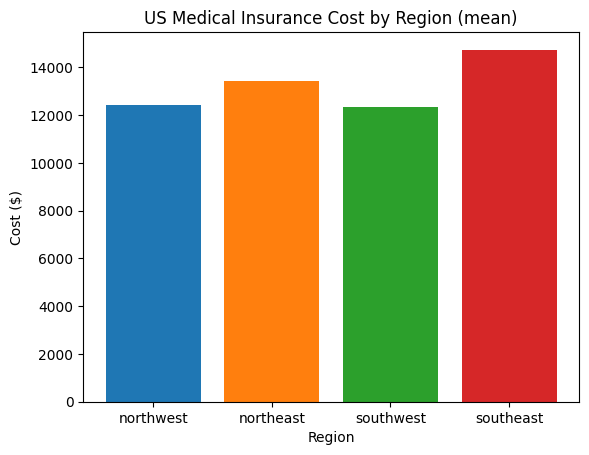

In [5]:
# Calculate mean insurance costs
nw_mean_cost = nw_df.charges.mean()
ne_mean_cost = ne_df.charges.mean()
sw_mean_cost = sw_df.charges.mean()
se_mean_cost = se_df.charges.mean()

mean_costs = [nw_mean_cost, ne_mean_cost, sw_mean_cost, se_mean_cost]
regions = ["northwest", "northeast", "southwest", "southeast"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
# Plot mean values
plt.bar(regions, mean_costs, color=colors)
plt.title("US Medical Insurance Cost by Region (mean)")
plt.xlabel("Region")
plt.ylabel("Cost ($)")
plt.savefig("./data/visualizations/descriptive/regional_mean_cost.png")
plt.show()

It appears that there is a disparity. The southeastern and northeastern regions of the US have larger mean insurance costs than the northwest and southwest regions. The southeastern region of the US has the largest of the average costs, followed by northeast. The northwest and southwestern regions are fairly similar, but it appears that the northwestern region has a slightly higher average cost.

### Distribution of Insurance Costs per Region

Now that I have identified a regional disparity in costs, I will look into the distribution of costs per region. To do this, I will use box plots. Visualizing this information will allow me to identify potential outliers in the costs that are affecting the mean values.

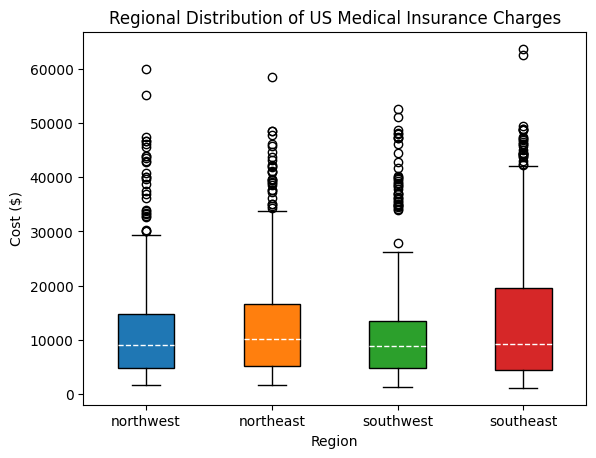

In [6]:
# Retrieve costs
nw_costs = nw_df.charges
ne_costs = ne_df.charges
sw_costs = sw_df.charges
se_costs = se_df.charges

costs = [nw_costs, ne_costs, sw_costs, se_costs]
regions = ["northwest", "northeast", "southwest", "southeast"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

props = {
        'linestyle': 'dashed',
        'color': 'white'
        }

# Get subplot axes
bplot = plt.boxplot(costs, labels=regions, patch_artist=True, medianprops=props)

for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)
plt.title("Regional Distribution of US Medical Insurance Charges")
plt.xlabel("Region")
plt.ylabel("Cost ($)")
plt.savefig("./data/visualizations/descriptive/regional_cost_distribution.png")
plt.show()

These boxplots serve to further highlight regional differences between the medical insurance charges. Here is what I identified for each:

- **Northwest**: The boxplot indicates that the insurance charges are relatively lower and tightly distributed. This suggests less variation in charges within this region, with fewer outliers than the other regions.

- **Northeast**: The median charge in the northeast is higher than that of the northwest and southwest. There is a moderate number of outliers, indicating that some individuals have significantly higher charges. The distribution is broader than the northwest, suggesting more variability.

- **Southwest**: This region shows a distribution similar to the northwest, with a slightly higher median. There are some high-cost outliers, but not as many as in the southeast.

- **Southeast**: The most striking feature is the number of high-cost outliers, which are substantially more than in any other region. The median cost is the highest among the four regions, and the spread of the central box is also wide, indicating significant variability in charges.

### Mean Age Per Region

Now, it's time to start looking into other differences between the regions. This will help me to identify any potential differences which may be indicative as to why the northeastern and southeastern regions have higher average costs.

[39.19692307692308, 39.26851851851852, 39.45538461538462, 38.93956043956044]


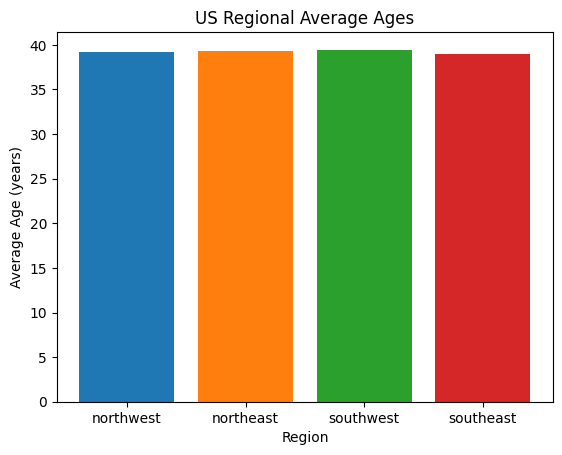

In [10]:
# Prepare data
nw_age = nw_df.age.mean()
ne_age = ne_df.age.mean()
sw_age = sw_df.age.mean()
se_age = se_df.age.mean()

ages = [nw_age, ne_age, sw_age, se_age]
regions = ["northwest", "northeast", "southwest", "southeast"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
print(ages)

# Plot mean values
plt.bar(regions, ages, color=colors)
plt.title("US Regional Average Ages")
plt.xlabel("Region")
plt.ylabel("Average Age (years)")
plt.savefig("./data/visualizations/descriptive/regional_mean_age.png")
plt.show()

It seems that for each region, the mean age is approximately 39 years old. There doesn't appear to be any significant differences in this variable that would indicate as to why the mean costs in the northeastern and southeastern regions are higher.

### Mean Number of Children Per Region

Again, I will be using a simple bar plot for this variable. It will allow me to identify if the number of children people have in a particular region may be in someway tied to the average cost in that region.

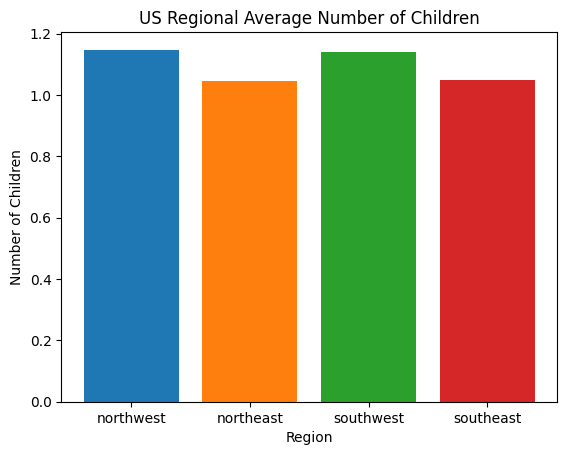

In [11]:
# Prepare data
nw_bmi = nw_df.children.mean()
ne_bmi = ne_df.children.mean()
sw_bmi = sw_df.children.mean()
se_bmi = se_df.children.mean()

n_children = [nw_bmi, ne_bmi, sw_bmi, se_bmi]
regions = ["northwest", "northeast", "southwest", "southeast"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Plot mean values
plt.bar(regions, n_children, color=colors)
plt.title("US Regional Average Number of Children")
plt.xlabel("Region")
plt.ylabel("Number of Children")
plt.savefig("./data/visualizations/descriptive/regional_mean_n_children.png")
plt.show()

Ok, this is really interesting. It seems that in the regions with higher average medical insurance costs, they are typically having few children. I can't determine if the number of children is pushing down medical insurance costs, or if fewer people are having more children due to their medical insurance costs. Or perhaps, another variable may be affecting both of these variables. Of course, that's if the correlation is not spurious. It may be worth looking into this further.

### Proportion of Smokers by Region

It's assumed that smoking will have a significant impact on ones insurance costs. If the southeastern and northeastern regions have higher proportions of smokers, it may indicate why these two regions have higher average insurance costs.

smoker
no     0.821538
yes    0.178462
Name: proportion, dtype: float64


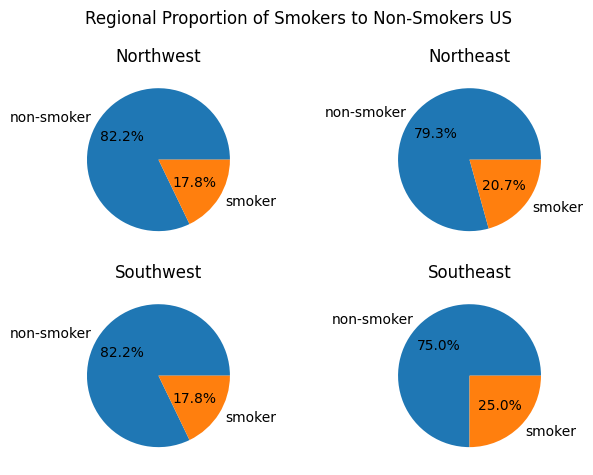

In [43]:
# Prepare data
nw_smokers = nw_df.smoker.value_counts(normalize=True)
ne_smokers = ne_df.smoker.value_counts(normalize=True)
sw_smokers = sw_df.smoker.value_counts(normalize=True)
se_smokers = se_df.smoker.value_counts(normalize=True)

print(sw_smokers)

# Plot
fig, ax = plt.subplots(2, 2)
nw_ax = ax[0,0]
ne_ax = ax[0,1]
sw_ax = ax[1,0]
se_ax = ax[1,1]

nw_ax.pie(nw_smokers, labels=["non-smoker", "smoker"], autopct="%1.1f%%")
nw_ax.set_title("Northwest")

ne_ax.pie(ne_smokers, labels=["non-smoker", "smoker"], autopct="%1.1f%%")
ne_ax.set_title("Northeast")

sw_ax.pie(sw_smokers, labels=["non-smoker", "smoker"], autopct="%1.1f%%")
sw_ax.set_title("Southwest")

se_ax.pie(se_smokers, labels=["non-smoker", "smoker"], autopct="%1.1f%%")
se_ax.set_title("Southeast")

fig.suptitle("Regional Proportion of Smokers to Non-Smokers US")

plt.tight_layout()
plt.savefig("./data/visualizations/descriptive/regional_smokers_to_non_smokers.png")
plt.show()

Now, this is another descriptive statistic that gives us a potential reason why the northeastern and southeastern regions have higher average medical insurance costs. The number of smokers in these regions is proportionally greater than in the north and southwestern regions.

### Average BMI Per Region

As we have the BMI variable, it would only make sense to use this to identify potential reasons why the Northeastern and Southeastern regions have higher average insurance costs, too. BMI is a score to indicate a persons weight relative to their height. It helps medical insurance companies to identify individuals who may be at greater risk of adverse health due to being either over or underweight.

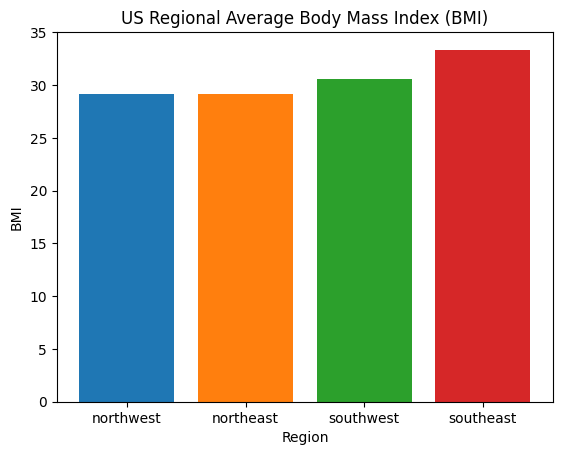

In [44]:
# Prepare data
nw_bmi = nw_df.bmi.mean()
ne_bmi = ne_df.bmi.mean()
sw_bmi = sw_df.bmi.mean()
se_bmi = se_df.bmi.mean()

n_children = [nw_bmi, ne_bmi, sw_bmi, se_bmi]
regions = ["northwest", "northeast", "southwest", "southeast"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Plot mean values
plt.bar(regions, n_children, color=colors)
plt.title("US Regional Average Body Mass Index (BMI)")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.savefig("./data/visualizations/descriptive/regional_mean_bmi.png")
plt.show()

It appears that the southeastern region has a particularly higher average BMI than the rest of the US. With the added effect of smoking, it is really helping to see potential reasons as to why the region has by-far the highest average medical insurance cost. However, it should be noted that the northeast, the second highest average medical insurance cost, does not follow this trend.

### Descriptive Statistics - Summary

To summarize my findings on analyzing the descriptive statistics in regional data, the northeastern and southeastern regions have the second highest, and highest average medical insurance costs respectively. The average age for all regions is fairly similar, at approximately 39 for every region. However, the southeastern and northeastern regions have fewer children, but higher average BMI's and a larger proportion of smokers to non-smokers.